<center><h1>DSCI 552 HW1</h1></center>

In [2]:
# packages for this homework1
import pandas as pd  # data processing
import numpy as np   # N-DIMENSIONAL ARRAYS
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
from sklearn.neighbors import KNeighborsClassifier      # KNN algorithm
from sklearn import metrics        # confusion matrix
from sklearn.model_selection import learning_curve   #learning curve
from sklearn.neighbors import DistanceMetric   #different distance methods

<h3>1. Vertebral Column Data Set</h3>

(b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1

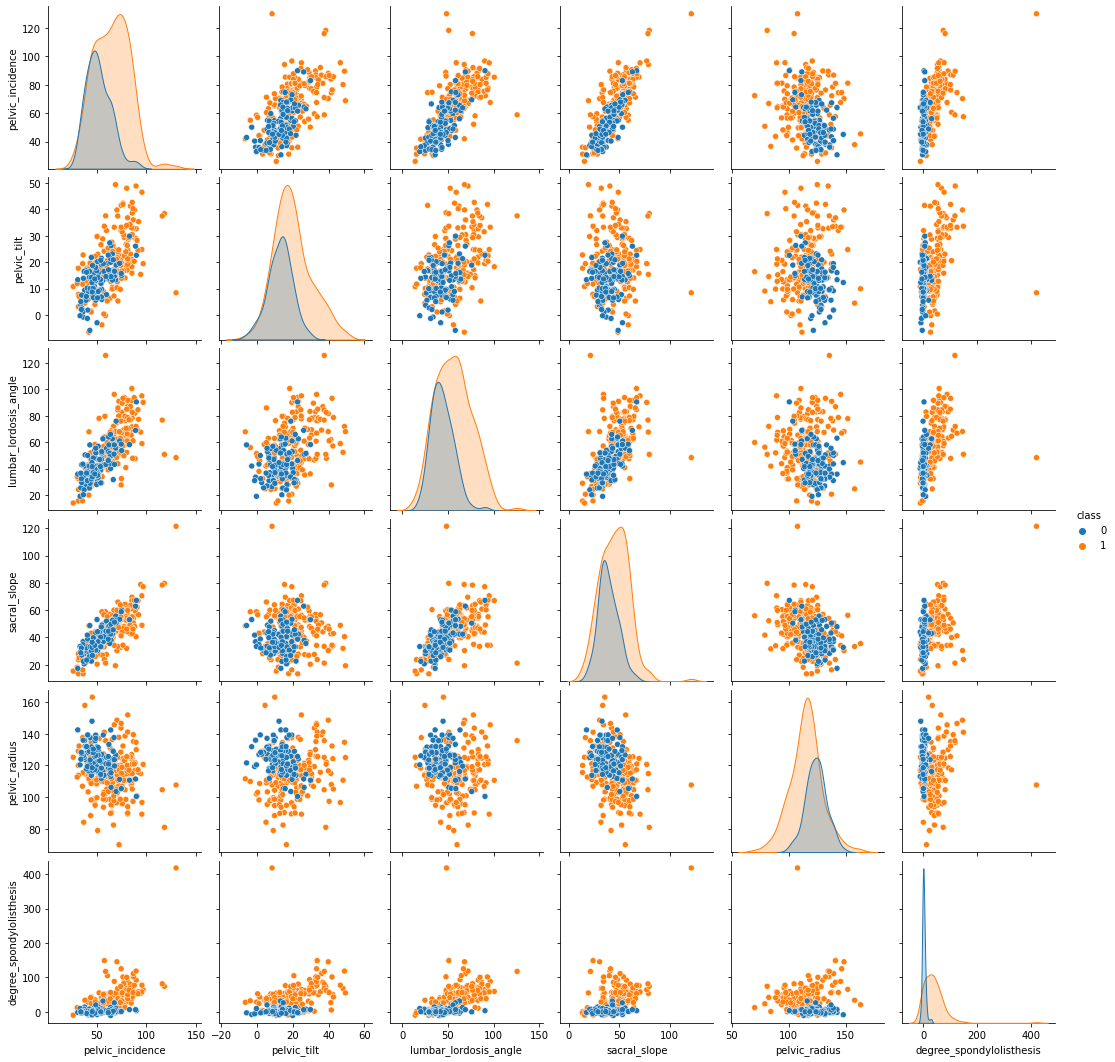

In [3]:
cols_names=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','class'] # add column names
data=pd.read_csv('../data/vertebral_column_data/column_2C.dat',sep=' ',names=cols_names)  #add names for each columns
df=pd.DataFrame(data) # convert to dataframe
df=df.replace(to_replace=['NO', 'AB'], value=[0, 1])  # convert labels to 0 and 1

# scatterplots
sns.pairplot(df, hue="class")
plt.show()

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

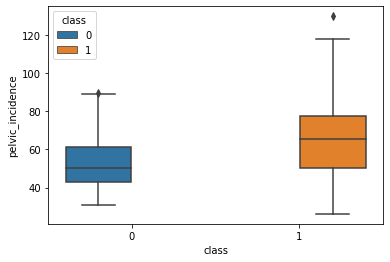

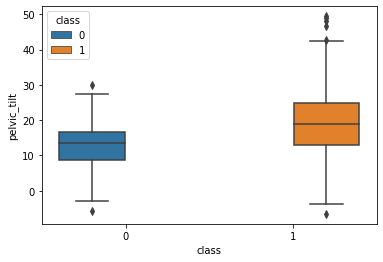

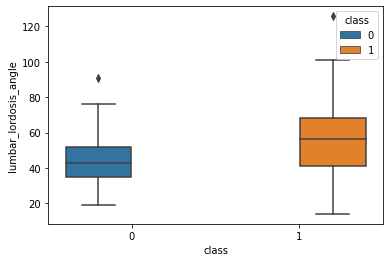

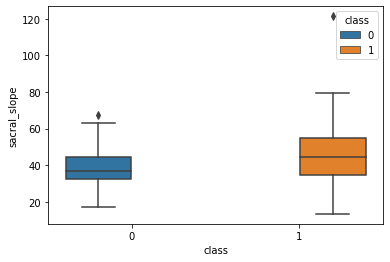

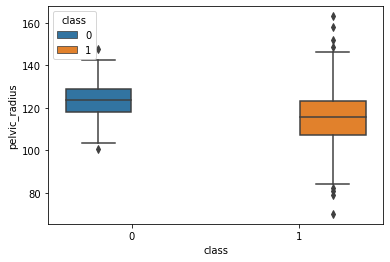

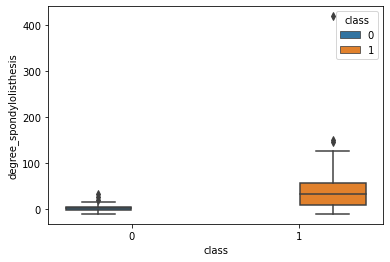

In [61]:
# boxplot for pelvic_incidence
sns.boxplot(x="class", y="pelvic_incidence", hue="class",data=df)

plt.show()

# boxplot for pelvic_tilt
sns.boxplot(x="class", y="pelvic_tilt", hue="class",data=df)
plt.show()

# boxplot for lumbar_lordosis_angle
sns.boxplot(x="class", y="lumbar_lordosis_angle", hue="class",data=df)
plt.show()

# boxplot for sacral_slope
sns.boxplot(x="class", y="sacral_slope", hue="class",data=df)
plt.show()

# boxplot for sacral_slope
sns.boxplot(x="class", y="pelvic_radius", hue="class",data=df)
plt.show()

# boxplot for degree_spondylolisthesis
sns.boxplot(x="class", y="degree_spondylolisthesis", hue="class",data=df)
plt.show()

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [110]:
# training set using head()
tr_rows_0=df.loc[df['class'] == 0].head(70)   #first 70 rows of Class 0 
tr_rows_1=df.loc[df['class'] == 1].head(140)  #the first 140 rows of Class 1
training_set=pd.concat([tr_rows_0, tr_rows_1])   #combine together
training_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [118]:
# test set using slice
t_rows_0=df[280:]     
t_rows_1=df[140:210]
test_set= pd.concat([t_rows_0, t_rows_1])  # combine together
test_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
280,50.09,13.43,34.46,36.66,119.13,3.09,0
281,64.26,14.50,43.90,49.76,115.39,5.95,0
282,53.68,13.45,41.58,40.24,113.91,2.74,0
283,49.00,13.11,51.87,35.88,126.40,0.54,0
284,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


(c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [243]:
# use a software package for KNN
x_train=training_set.iloc[:,0:-1]
y_train=training_set.iloc[:,-1:]
x_test=test_set.iloc[:,0:-1]
y_test=test_set.iloc[:,-1:]
# use a software package for KNN
knn= KNeighborsClassifier(n_neighbors=3)  #create KNN Classifier with k=3
knn.fit(x_train,np.ravel(y_train))
knn.predict(x_train)   # predict x_train
#print(knn.score(x_train,np.ravel(y_train)))

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

ii. Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

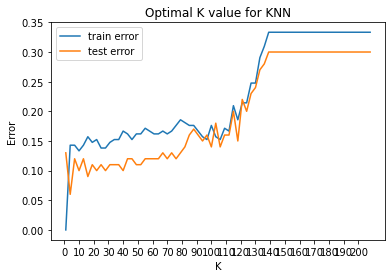

In [281]:
error_train=[]
error_test= []

# KNN loop 
for k in range(208,0,-3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, np.ravel(y_train))
    train_pred = knn.predict(x_train) #predict train
    test_pred = knn.predict(x_test)  #predict test
    
    error_train.append(np.mean(y_train['class'].to_numpy()!= train_pred)) #calculate train errors and add to the list
    error_test.append(np.mean(y_test['class'].to_numpy() != test_pred))   #calculate test errors and add to the list

# ploting errors for testing and training in range (208,0,-3)
plt.plot(range(208,0,-3),error_train,label='train error')
plt.plot(range(208,0,-3),error_test,label='test error')
plt.title("Optimal K value for KNN")
plt.xlabel('K')
plt.ylabel('Error')
plt.xticks(range(0,209,10))
plt.legend()

K=5 is the most suitable k among those values. Because it seems like k=5 is the lowest value in test error as the test error increases later.

In [291]:
#create confusion matrix
print(pd.crosstab(y_test['class'].to_numpy(), test_pred))
#true positive rate =67
print('true positive rate=67')
#true negative rate=20
print('true negative rate=20')
#precision
print(metrics.precision_score(y_test['class'].to_numpy(), test_pred))
#F1-score
print(metrics.f1_score(y_test['class'].to_numpy(), test_pred))

col_0   0   1
row_0        
0      20  10
1       3  67
true positive rate=67
true negative rate=20
0.8701298701298701
0.9115646258503401


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

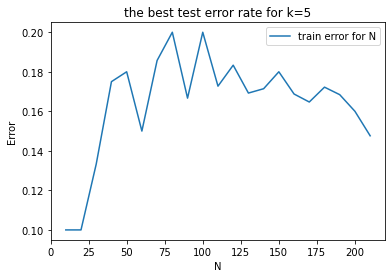

In [332]:
error_N=[]
for N in range(10,211,10):

    train0=training_set.loc[training_set['class'] == 0].head(N//3)
    train1=training_set.loc[training_set['class'] == 1].head(N-(N//3))
    test_n= pd.concat([train0, train1])
    train_n_x=test_n.iloc[:,0:-1]
    train_n_y=test_n.iloc[:,-1:]
    
    #best test rate
    knn = KNeighborsClassifier(n_neighbors=5)  #the best test error rate
    knn.fit(train_n_x, np.ravel(train_n_y))
    train_pred = knn.predict(train_n_x)
    error_N.append(np.mean(test_n['class'].to_numpy() != train_pred))

# plot the best test error rate
plt.plot(range(10,211,10),error_N,label='train error for N')
plt.title("the best test error rate for k=5")
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()


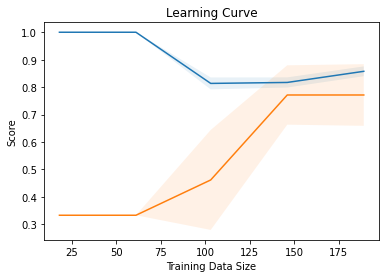

In [333]:
for N in range(10,211,10):

    train0=training_set.loc[training_set['class'] == 0].head(N//3)
    train1=training_set.loc[training_set['class'] == 1].head(N-(N//3))
    test_n= pd.concat([train0, train1])
    train_n_x=test_n.iloc[:,0:-1]
    train_n_y=test_n.iloc[:,-1:]

    knn = KNeighborsClassifier(n_neighbors=5)  #the best test error rate
    knn.fit(train_n_x, np.ravel(train_n_y))
    train_pred = knn.predict(train_n_x)
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=knn.fit(train_n_x, np.ravel(train_n_y)), X=train_n_x, y=np.ravel(train_n_y),cv=10)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
#
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-Validation')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.show()

(d) Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:
    
    A. which becomes Manhattan Distance with p = 1.

In [389]:
error_manhattan={}
#KNN with Manhattan Distance with p=1
for k in range(1,197,5): #k range
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan',p=1)  #p=1 manhattan distance
    knn.fit(x_train, np.ravel(y_train))
    test_pred = knn.predict(x_test)
    error=np.mean(y_test['class'].to_numpy() != test_pred) #calculate the error
    error_manhattan[k]=error #add k and error into the dictionary
#summarize the test errors in a table
error_manhattan=pd.DataFrame(error_manhattan.items(),columns=['k','test_error']) 
error_manhattan
    

,k,test_error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


k=6 is the most suitable k among those values. Because it seems like k=6 is the first lowest value in test error 0.11 as the test error increases later.

    B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance              in 1(d)iA. What is the best log10(p)?

In [390]:
error_manhattan_p={}
list=[]
for i in range(1,11):
    list.append(10**(i/10))
list  #calculate the p range

for p in list: #k range
    knn = KNeighborsClassifier(n_neighbors=6,p=p,metric='manhattan')  #k=6
    knn.fit(x_train, np.ravel(y_train))
    test_pred = knn.predict(x_test)
    error=np.mean(y_test['class'].to_numpy() != test_pred) #calculate the error
    error_manhattan_p[p]=error #add k and error into the dictionary
#summarize the test errors in a table
error_manhattan_p=pd.DataFrame(error_manhattan_p.items(),columns=['p','test_error']) 
error_manhattan_p

,p,test_error
0,1.258925,0.11
1,1.584893,0.11
2,1.995262,0.11
3,2.511886,0.11
4,3.162278,0.11
5,3.981072,0.11
6,5.011872,0.11
7,6.309573,0.11
8,7.943282,0.11
9,10.000000,0.11


It seems like the best test error for log10(p)is 0.11. However, I found them all to be the same with different p values.

    C. which becomes Chebyshev Distance with p → ∞

In [405]:
chebyshev={}

for k in range(1,197,5): #k range
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev') 
    knn.fit(x_train, np.ravel(y_train))
    test_pred = knn.predict(x_test)
    error=np.mean(y_test['class'].to_numpy() != test_pred) #calculate the error
    chebyshev[k]=error #add k and error into the dictionary
#summarize the test errors in a table
chebyshev=pd.DataFrame(chebyshev.items(),columns=['k','test_error']) 
chebyshev

,k,test_error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


k=6 is the most suitable k among those values. Because it seems like k=6 is the first lowest value in test error 0.10 as the test error increases later.

ii. Mahalanobis Distance.

In [419]:
mahalanobis={}
#KNN with Manhattan Distance with p=1
for k in range(1,197,5): #k range
    knn = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',metric_params={'VI': np.cov(x_train,rowvar=False)})  
    knn.fit(x_train,np.ravel(y_train))
    test_pred = knn.predict(x_test)
    error=np.mean(y_test['class'].to_numpy() != test_pred) #calculate the error
    mahalanobis[k]=error #add k and error into the dictionary
#summarize the test errors in a table
mahalanobis=pd.DataFrame(mahalanobis.items(),columns=['k','test_error']) 
mahalanobis


,k,test_error
0,1,0.12
1,6,0.08
2,11,0.09
3,16,0.08
4,21,0.10
5,26,0.09
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.11


k=6 is the most suitable k among those values. Because it seems like k=6 is the first lowest value in test error 0.08 as the test error increases later.

(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [427]:
#weighted voting with Euclidean
euclidean_error={}
for k in range(1,197,5): #k range
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance', metric='euclidean') 
    knn.fit(x_train, np.ravel(y_train))
    test_pred = knn.predict(x_test)
    error=np.mean(y_test['class'].to_numpy() != test_pred) #calculate the error
    euclidean_error[k]=error #add k and error into the dictionary
#summarize the test errors in a table
euclidean_error=pd.DataFrame(euclidean_error.items(),columns=['k','test_error']) 
euclidean_error

,k,test_error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.11
4,21,0.11
5,26,0.11
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


The best test score is 0.10 using weighted voting with Euclidean distances when k ∈ {1,6,11,16,...,196}.

In [429]:
#weighted voting with manhattan
Manhattan_error={}
for k in range(1,197,5): #k range
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',p=1, metric='manhattan') 
    knn.fit(x_train, np.ravel(y_train))
    test_pred = knn.predict(x_test)
    error=np.mean(y_test['class'].to_numpy() != test_pred) #calculate the error
    Manhattan_error[k]=error #add k and error into the dictionary
#summarize the test errors in a table
Manhattan_error=pd.DataFrame(Manhattan_error.items(),columns=['k','test_error']) 
Manhattan_error

,k,test_error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.11
5,26,0.10
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


The best test score is 0.10 using weighted voting with manhattan distances when k ∈ {1,6,11,16,...,196}.

In [430]:
#weighted voting with chebyshev
chebyshev_error={}
for k in range(1,197,5): #k range
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance', metric='chebyshev') 
    knn.fit(x_train, np.ravel(y_train))
    test_pred = knn.predict(x_test)
    error=np.mean(y_test['class'].to_numpy() != test_pred) #calculate the error
    chebyshev_error[k]=error #add k and error into the dictionary
#summarize the test errors in a table
chebyshev_error=pd.DataFrame(chebyshev_error.items(),columns=['k','test_error']) 
chebyshev_error

,k,test_error
0,1,0.13
1,6,0.13
2,11,0.12
3,16,0.11
4,21,0.12
5,26,0.12
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.12


The best test score is 0.11 using weighted voting with chebyshev distances when k ∈ {1,6,11,16,...,196}.

(f) What is the lowest training error rate you achieved in this homework?

The lowest training error rate I achieved in this homework is 0.08

I saw k=6 uaully result in the lowest training error, and I believe k=6 is the optimal k value is this case. Since it has the first lowest test error and test error increases later.  

The lower test error will have higher test accuracy.